# 5. Bank_Churnrate_Modeling<a id='2_Data_wrangling'></a>

## 5.1 Table of Contents<a id='2.1_Contents'></a>
* 5. Bank_Churnrate_EDA
  * 5.1 Table of Contents
  * 5.2 Introduction
  * 5.3 Imports
  * 5.4 Load Scaled Train Test Bank Churn Data
  * 5.5 Modeling
    * 5.5.1 Logistic Regression 
    * 5.5.2 Random Forest Classifier
    * 5.5.3 Gradient Boosting Classifier
    * 5.5.4 Support Vector Classifier (SVC)
    * 5.5.5 Improve Random Forest and Gradient Boosting with AdaBoost Classifier
    * 5.5.6 Neural Network Classifier (Multi-Layer Perceptron)
  * 5.6 Compile and Assess Model Performance
      * 5.6.1 Retrieve ROC AUC Scores and Plot Curves
      * 5.6.2 Create and Compare Results DataFrame
  * 5.7 Save Data & Summary

## 5.2 Introduction

Different predictive models for classification will be built and trained with the 70/30 train test sets and then assessed to determine best model performer. Models tested will be Logistic Regression, RandomForestClassifier with Bagging, Gradient Boosting Classifier which is random forest but with boosting, Support Vector Machines, Ada Boost Classifier, and Neural Network Multi-Layer Perceptron Classifier models. Also assessing model's performance based on dataset where the missing valued rows were dropped versus being imputed with the 'missing' categorical column.

## 5.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to perform modeling and appropriate assessments.

In [1]:
#Import pandas, matplotlib.pyplot, time, and sklearn models and ensemble and metrics packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
import time
import os
random_state = 42

## 5.4 Load Scaled Train Test Bank Churn Data

In [2]:
#Load Train Test Data for both missing and dropped bank churn datasets
X_train_missing = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/X_train_scaled_missing.csv', index_col=0)
X_train_dropped = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/X_train_scaled_dropped.csv')
X_test_missing = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/X_test_scaled_missing.csv')
X_test_dropped = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/X_test_scaled_dropped.csv')
y_train_missing = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/y_train_missing.csv')
y_train_dropped = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/y_train_dropped.csv')
y_test_missing = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/y_test_missing.csv')
y_test_dropped = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/Test_Train_Sets/y_test_dropped.csv')

Auditing the datasets shape and .head() displaying the first few records.

In [3]:
#Apply shape and .head() for all X and y Train and Test missing and dropped datasets
X_train_missing.shape

(5670, 32)

In [4]:
X_train_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.413491,1.287980,-1.352932,-0.517792,-0.351164,1.401509,0.475754,0.721852,0.412086,-0.417043,...,1.246617,-0.279923,-0.28538,-0.465551,2.509442,-0.426890,-0.348800,-0.110175,-0.044089,-0.240901
1,1.455723,-1.039496,0.003960,0.767902,-0.351164,0.492604,-0.436921,-1.422478,-0.311172,0.672648,...,-0.802171,-0.279923,-0.28538,-0.465551,-0.398495,-0.426890,2.866969,-0.110175,-0.044089,-0.240901
2,0.334195,1.287980,-0.859517,-1.160639,-0.351164,-0.416301,2.266265,1.663444,2.120213,0.039323,...,-0.802171,3.572413,-0.28538,-0.465551,-0.398495,2.342523,-0.348800,-0.110175,-0.044089,-0.240901
3,-0.288877,2.063805,-0.489456,0.767902,0.620579,-0.416301,0.662110,-0.347248,0.693244,0.053294,...,1.246617,-0.279923,-0.28538,-0.465551,-0.398495,2.342523,-0.348800,-0.110175,-0.044089,-0.240901
4,1.331109,0.512154,1.854266,-1.160639,2.564066,-0.416301,-0.800048,-1.422478,-0.674506,-0.128321,...,-0.802171,-0.279923,-0.28538,-0.465551,-0.398495,-0.426890,2.866969,-0.110175,-0.044089,-0.240901


In [5]:
X_train_dropped.shape

(3983, 29)

In [6]:
X_train_dropped.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.508894,0.527369,-0.985376,-1.182990,0.634121,-0.411583,-0.523637,-1.409925,-0.397529,0.176166,...,-0.4493,-0.302048,1.200858,-0.297071,2.004089,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327
1,-0.638935,-1.029141,-0.483361,-0.531732,1.636781,-0.411583,0.240640,0.228737,0.220310,-0.262182,...,-0.4493,-0.302048,-0.832738,-0.297071,2.004089,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327
2,0.355304,2.083878,-0.106850,-1.834248,-0.368540,-0.411583,2.866147,-0.102927,2.877769,0.176166,...,-0.4493,-0.302048,-0.832738,-0.297071,-0.498980,2.356053,-0.451317,9.572247,-0.038842,-0.235327
3,-0.763215,-0.250886,-0.985376,1.422041,-0.368540,0.494127,-0.533551,0.029739,-0.536664,0.838350,...,-0.4493,-0.302048,-0.832738,-0.297071,-0.498980,-0.424439,2.215738,-0.104469,-0.038842,-0.235327
4,-0.514655,1.305623,0.018654,0.770783,-0.368540,0.494127,0.225328,-1.409925,0.352059,-1.162193,...,-0.4493,-0.302048,1.200858,-0.297071,2.004089,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327


In [7]:
X_test_missing.shape

(2431, 32)

In [8]:
X_test_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.331109,-0.263671,0.003960,-0.517792,-2.294651,-1.325206,-0.661807,0.349138,-0.693108,0.272163,...,-0.802171,-0.279923,-0.28538,-0.465551,-0.398495,-0.426890,-0.3488,-0.110175,-0.044089,-0.240901
1,-0.413491,1.287980,-0.242748,0.767902,0.620579,0.492604,-0.742232,-0.222193,-0.722973,1.226807,...,-0.802171,3.572413,-0.28538,-0.465551,-0.398495,-0.426890,-0.3488,-0.110175,-0.044089,-0.240901
2,-1.908862,-1.039496,-1.722994,0.767902,-1.322908,2.310414,-0.233091,-1.422478,-0.107226,0.807695,...,1.246617,-0.279923,-0.28538,-0.465551,-0.398495,-0.426890,-0.3488,-0.110175,-0.044089,-0.240901
3,0.832652,0.512154,0.497375,0.125055,1.592322,1.401509,-0.299298,0.686297,-0.360258,-0.361161,...,-0.802171,-0.279923,-0.28538,-0.465551,-0.398495,2.342523,-0.3488,-0.110175,-0.044089,-0.240901
4,1.455723,-1.039496,1.484205,0.125055,-0.351164,-0.416301,-0.800048,-0.440426,-0.761492,-0.770960,...,-0.802171,-0.279923,-0.28538,-0.465551,-0.398495,-0.426890,-0.3488,-0.110175,-0.044089,-0.240901


In [9]:
X_test_dropped.shape

(1707, 29)

In [10]:
X_test_dropped.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.136055,1.305623,0.018654,1.422041,-0.368540,0.494127,-0.777628,-1.409925,-0.651732,-0.887060,...,-0.449300,-0.302048,1.200858,-0.297071,-0.49898,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327
1,0.355304,1.305623,0.018654,0.770783,-1.371201,0.494127,-0.719829,0.452302,-0.761022,0.530574,...,-0.449300,-0.302048,1.200858,-0.297071,-0.49898,-0.424439,2.215738,-0.104469,-0.038842,-0.235327
2,0.852423,0.527369,1.399194,0.119525,-1.371201,-0.411583,-0.764002,-0.487410,-0.720891,0.777728,...,-0.449300,-0.302048,-0.832738,-0.297071,-0.49898,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327
3,0.976703,-0.250886,0.897180,1.422041,-1.371201,0.494127,-0.777628,-0.034137,-0.775212,0.274094,...,-0.449300,3.310734,-0.832738,-0.297071,-0.49898,-0.424439,-0.451317,-0.104469,-0.038842,-0.235327
4,-0.141816,-0.250886,0.018654,0.770783,0.634121,-0.411583,-0.691408,0.239792,-0.713505,0.516585,...,2.225682,-0.302048,-0.832738,-0.297071,-0.49898,2.356053,-0.451317,-0.104469,-0.038842,-0.235327


In [11]:
y_train_missing.shape

(5670, 1)

In [12]:
y_train_missing.head()

,Attrition_Flag
0,1
1,1
2,1
3,1
4,0


In [13]:
y_train_dropped.shape

(3983, 1)

In [14]:
y_train_dropped.head()

,Attrition_Flag
0,0
1,1
2,1
3,1
4,0


In [15]:
y_test_missing.shape

(2431, 1)

In [16]:
y_test_missing.head()

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1


In [17]:
y_test_dropped.shape

(1707, 1)

In [18]:
y_test_dropped.head()

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1


## 5.5 Modeling

### 5.5.1 Logistic Regression

Apply Logistic Regression model and determine performance to see if applying assumption of datasets being linear are proper performer for the datasets.

In [19]:
#Build Logistic Regression model with 'saga' solver in order to test each regularization methods with GridSearchCV with standard 5 fold cv.
#Referred to stackoverflow regarding receiving warnings when applying trained y values to model: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected 
def logregmodel(X_train, y_train):
    start = time.time()
    logreg = LogisticRegression(random_state=random_state)
    params_log = {'penalty':['l1', 'l2', 'elasticnet', None], 'C':[0.001, 0.01, 0.1, 0.5, 1,10], 'solver':['lbfgs', 'liblineaer', 'netwon-cg', 'newton-cholesky', 'sag', 'saga']}
    logreg_GS = GridSearchCV(estimator = logreg, param_grid = params_log, cv=5)
    logreg_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return logreg_GS.best_params_ , logreg_GS.best_score_ , end

In [20]:
log_reg_missing_params , logreg_missing_score, time_log_missing, = logregmodel(X_train_missing, y_train_missing)

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

In [21]:
print(f"Approximate Logistic Regression Model Build Time with GridSearch CV : {round(time_log_missing , 2)} seconds")
print(f"Logistic Regression Model Best Parameters given Missing Dataset: {log_reg_missing_params}")
print(f"Logistic Regression Model Best Parameter Score given Missing Dataset: {logreg_missing_score}")

Approximate Logistic Regression Model Build Time with GridSearch CV : 15.4 seconds
Logistic Regression Model Best Parameters given Missing Dataset: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Model Best Parameter Score given Missing Dataset: 0.9037037037037038


Applying GridSearchCV for Hyperparameter tuning with Logistic Regression best params for 'saga' solver of a C value of 1 and having a regularization paramter applied of 'l1' to suppress values being too large.

In [23]:
log_reg_missing_best = LogisticRegression(random_state=random_state, solver='saga', C=1, penalty='l1')
log_reg_missing_best.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_log_missing = log_reg_missing_best.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_log_missing))
print(classification_report(y_test_missing, y_pred_log_missing, target_names=['churn', 'not_churned']))

0.9062114356232003
              precision    recall  f1-score   support

       churn       0.73      0.58      0.65       360
 not_churned       0.93      0.96      0.95      2071

    accuracy                           0.91      2431
   macro avg       0.83      0.77      0.80      2431
weighted avg       0.90      0.91      0.90      2431



In [24]:
#Apply same parameters to build Logistic Regression Model for Dropped Bank Churn datasets to assess performance
log_reg_dropped_params , logreg_dropped_score, time_log_dropped = logregmodel(X_train_dropped, y_train_dropped)

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

In [25]:
print(f"Approximate Logistic Regression Model Build Time with GridSearch CV : {round(time_log_dropped , 2)} seconds")
print(f"Logistic Regression Model Best Parameters given Dropped Dataset: {log_reg_dropped_params}")
print(f"Logistic Regression Model Best Parameter Score given Dropped Dataset: {logreg_dropped_score}")

Approximate Logistic Regression Model Build Time with GridSearch CV : 14.31 seconds
Logistic Regression Model Best Parameters given Dropped Dataset: {'C': 0.001, 'penalty': None, 'solver': 'saga'}
Logistic Regression Model Best Parameter Score given Dropped Dataset: 0.8993215765149462


In [26]:
log_reg_dropped_best = LogisticRegression(random_state=random_state, solver='saga', C=0.001, penalty=None)
log_reg_dropped_best.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_log_dropped = log_reg_dropped_best.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_log_dropped))
print(classification_report(y_test_dropped, y_pred_log_dropped, target_names=['churn', 'not_churned']))

0.9144698301113063
              precision    recall  f1-score   support

       churn       0.76      0.59      0.66       244
 not_churned       0.93      0.97      0.95      1463

    accuracy                           0.91      1707
   macro avg       0.85      0.78      0.81      1707
weighted avg       0.91      0.91      0.91      1707



C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Looking at the above assessment, it seems the Logistic Regression model has high accuracy however it is not the best at predicting when the user has churned. This might be due to the reality that there is class imbalance where there are siginificatly more not churned users than churned in the dataset. Therefore applying a logistic regression model might not be the best in terms of determing an overall generalizable predictive model to determine bank churn rate. 

However, the dataset where the null valued rows were dropped, had a slighlty better precision and recall in terms of predicting churn regarding customers in the dataset. This might be due to the reality that having less data might incur less imbalance in the dataset, thereby increasing the precision and recall. It also seemed accuracy increased as well.

### 5.5.2 Random Forest Classifier

Buidling Random Forest Classifier model and fitting with X_train and y_train datasets for missing and dropped.

In [27]:
#Build RandomForestClassifier model with list of n # of tress, and different criterion to split with max_depth being a range from 0 to 1000 with 5 fold cv.
def randforestmodel(X_train, y_train):
    start = time.time()
    randForest = RandomForestClassifier(random_state=random_state)
    params_randForest = {'n_estimators':[1,10,100], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':list(range(1,10))}
    randForest_GS = GridSearchCV(estimator = randForest, param_grid = params_randForest, cv=5)
    randForest_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return randForest_GS.best_params_ , randForest_GS.best_score_ , end

In [28]:
#Applied Random Forest Classifier model to 'missing' bank churn X and y training data
randForestparams_missing , randForestScore_missing , randForestTime_missing = randforestmodel(X_train_missing, y_train_missing)

In [29]:
print(f"Approximate Random Forest Classifier Model Build Time with GridSearchCV : {round(randForestTime_missing , 2)} seconds")
print(f"Random Forest Classifier Model Best Parameters given Missing Dataset: {randForestparams_missing}")
print(f"Random Forest Classifier Model Best Parameter Score given Missing Dataset: {randForestScore_missing}")

Approximate Random Forest Classifier Model Build Time with GridSearchCV : 62.87 seconds
Random Forest Classifier Model Best Parameters given Missing Dataset: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
Random Forest Classifier Model Best Parameter Score given Missing Dataset: 0.9409171075837742


In [30]:
#Applying best params for RandomForestClassifier for X_train_missing and y_train_missing
randForest_missing = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
randForest_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_randForest_missing = randForest_missing.predict(X_test_missing)
print(accuracy_score(y_test_missing, y_pred_randForest_missing))
print(classification_report(y_test_missing, y_pred_randForest_missing, target_names=['churn', 'not_churned']))

0.9391197038255862
              precision    recall  f1-score   support

       churn       0.89      0.68      0.77       360
 not_churned       0.95      0.99      0.96      2071

    accuracy                           0.94      2431
   macro avg       0.92      0.83      0.87      2431
weighted avg       0.94      0.94      0.94      2431



In [31]:
#Applied Random Forest Classifier model to 'dropped' bank churn X and y training data
randForestparams_dropped , randForestScore_dropped , randForestTime_dropped = randforestmodel(X_train_dropped, y_train_dropped)

In [32]:
print(f"Approximate Random Forest Classifier Model Build Time with GridSearchCV : {round(randForestTime_dropped , 2)} seconds")
print(f"Random Forest Classifier Model Best Parameters given Missing Dataset: {randForestparams_dropped}")
print(f"Random Forest Classifier Model Best Parameter Score given Missing Dataset: {randForestScore_dropped}")

Approximate Random Forest Classifier Model Build Time with GridSearchCV : 52.23 seconds
Random Forest Classifier Model Best Parameters given Missing Dataset: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
Random Forest Classifier Model Best Parameter Score given Missing Dataset: 0.9399932535954554


In [33]:
#Applying best params for RandomForestClassifier for X_train_dropped and y_train_dropped
randForest_dropped = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
randForest_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_randForest_dropped = randForest_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_randForest_dropped))
print(classification_report(y_test_dropped, y_pred_randForest_dropped, target_names=['churn', 'not_churned']))

0.9496192149970709
              precision    recall  f1-score   support

       churn       0.96      0.68      0.79       244
 not_churned       0.95      1.00      0.97      1463

    accuracy                           0.95      1707
   macro avg       0.95      0.84      0.88      1707
weighted avg       0.95      0.95      0.95      1707



Looking at the above results regarding the RandomForestClassifier model for both missing and dropped datasets, it seems that the model as a whole siginificantly improved in prediction with the RandomForestClassifier model as compared with logistic regression. And it seems that overall precision for the 'dropped' dataset seemed to be better than the missing. This might be again due to size of the respective datasets as the 'dropped' being smaller might lead to having a larger prediction score than just imputing the null values as 'missing.' Again the accuracy for the 'dropped' dataset is slighltly higher than the 'missing' dataset for potentially the same reason of having less data to predict.

### 5.5.3 Gradient Boosting Classifier

Buidling Gradient Boosting Classifier model and fitting with X_train and y_train datasets for missing and dropped.

In [34]:
#Build GradientBoostingClassifier model with list learning rates and of n # of tress, and different criterion to split with max_depth being a range from 0 to 10 with 5 fold cv.
def gradboostmodel(X_train, y_train):
    start = time.time()
    gradBoost = GradientBoostingClassifier(random_state=random_state)
    params_gradBoost = {'learning_rate':[0.001, 0.1, 1, 10], 'n_estimators':[1,10,100], 'criterion':['friedman_mse', 'squared_error'], 'max_depth':list(range(1,10))}
    gradBoost_GS = GridSearchCV(estimator = gradBoost, param_grid = params_gradBoost, cv=5)
    gradBoost_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return gradBoost_GS.best_params_ , gradBoost_GS.best_score_ , end

In [35]:
#Applied GradientBoosting Classifier model to 'missing' bank churn X and y training data
gradBoostparams_missing , gradBoostScore_missing , gradBoostTime_missing = gradboostmodel(X_train_missing, y_train_missing)

In [36]:
print(f"Approximate Gradient Boosting Classifier Model Build Time with GridSearchCV : {round(gradBoostTime_missing , 2)} seconds")
print(f"Gradient Boosting Classifier Model Best Parameters given Missing Dataset: {gradBoostparams_missing}")
print(f"Gradient Boosting Classifier Model Best Parameter Score given Missing Dataset: {gradBoostScore_missing}")

Approximate Gradient Boosting Classifier Model Build Time with GridSearchCV : 846.87 seconds
Gradient Boosting Classifier Model Best Parameters given Missing Dataset: {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Gradient Boosting Classifier Model Best Parameter Score given Missing Dataset: 0.9682539682539681


In [37]:
#Applying best params for GradientBoostingClassifier model for X_train_missing and y_train_missing
gradBoost_missing = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='squared_error', max_depth=6)
gradBoost_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_gradBoost_missing = gradBoost_missing.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_gradBoost_missing))
print(classification_report(y_test_missing, y_pred_gradBoost_missing, target_names=['churn', 'not_churned']))

0.9679144385026738
              precision    recall  f1-score   support

       churn       0.93      0.85      0.89       360
 not_churned       0.97      0.99      0.98      2071

    accuracy                           0.97      2431
   macro avg       0.95      0.92      0.93      2431
weighted avg       0.97      0.97      0.97      2431



In [38]:
#Applied GradientBoosting Classifier model to 'dropped' bank churn X and y training data
gradBoostparams_dropped , gradBoostScore_dropped , gradBoostTime_dropped = gradboostmodel(X_train_dropped, y_train_dropped)

In [39]:
print(f"Approximate Gradient Boosting Classifier Model Build Time with GridSearchCV : {round(gradBoostTime_dropped , 2)} seconds")
print(f"Gradient Boosting Classifier Model Best Parameters given Dropped Dataset: {gradBoostparams_dropped}")
print(f"Gradient Boosting Classifier Model Best Parameter Score given Dropped Dataset: {gradBoostScore_dropped}")

Approximate Gradient Boosting Classifier Model Build Time with GridSearchCV : 603.65 seconds
Gradient Boosting Classifier Model Best Parameters given Dropped Dataset: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Classifier Model Best Parameter Score given Dropped Dataset: 0.9671109625921325


In [40]:
#Applying best params for GradientBoostingClassifier model for X_train_dropped and y_train_dropped
gradBoost_dropped = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='friedman_mse', max_depth=5)
gradBoost_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_gradBoost_dropped = gradBoost_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_gradBoost_dropped))
print(classification_report(y_test_dropped, y_pred_gradBoost_dropped, target_names=['churn', 'not_churned']))

0.968365553602812
              precision    recall  f1-score   support

       churn       0.94      0.84      0.88       244
 not_churned       0.97      0.99      0.98      1463

    accuracy                           0.97      1707
   macro avg       0.95      0.91      0.93      1707
weighted avg       0.97      0.97      0.97      1707



Looking at the above results, it seems GradientBoosting Classifier though has longer computation time, was able to improve predictability over just the RandomForestClassifier Model in terms of precision and recall for predicting churn in the datasets. And the overall accuracy increased as well from the RandomForestClassifer.  

Between the 'missing' and 'dropped' datasets it seems again that in dropping the missing values, there is a higher precision but recall is slightly less for the dropped versus the dataset. This might be due to the size of the dropped dataset being smaller so there is less confidence in being able to predict values for churn in the Attrition_Flag column.

### 5.5.4 Support Vector Classifier (SVC) 

Buidling Support Vector Classifier model and fitting with X_train and y_train datasets for missing and dropped.

In [41]:
#Build Support Vector Machine model with list of C values as well as kernel and gamma methods with 5 fold cv.
#Assistance regarding appropriate params to test SVC found on https://stackoverflow.com/questions/36306555/scikit-learn-grid-search-with-svm-regression
def svcmodel(X_train, y_train):
    start = time.time()
    svcmodel = SVC(random_state=random_state)
    params_SVC = {'C':[0.001, 0.1, 1, 10], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}
    svc_GS = GridSearchCV(estimator = svcmodel, param_grid = params_SVC, cv=5)
    svc_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return svc_GS.best_params_ , svc_GS.best_score_ , end

In [42]:
#Applied Support Vector Classifier model to 'missing' bank churn X and y training data
svcparams_missing , svcScore_missing , svcTime_missing = svcmodel(X_train_missing, y_train_missing)

In [43]:
print(f"Approximate Support Vector Classifier Model Build Time with GridSearchCV : {round(svcTime_missing , 2)} seconds")
print(f"Support Vector Classifier Model Best Parameters given Missing Dataset: {svcparams_missing}")
print(f"Support Vector Classifier Model Best Parameter Score given Missing Dataset: {svcScore_missing}")

Approximate Support Vector Classifier Model Build Time with GridSearchCV : 80.43 seconds
Support Vector Classifier Model Best Parameters given Missing Dataset: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Classifier Model Best Parameter Score given Missing Dataset: 0.9171075837742505


In [44]:
#Applying best params for Support Vector Classifier model for X_train_missing and y_train_missing
svc_missing = SVC(C=10, gamma = 'scale', kernel='rbf', random_state=random_state)
svc_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_svc_missing = svc_missing.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_svc_missing))
print(classification_report(y_test_missing, y_pred_svc_missing, target_names=['churn', 'not_churned']))

0.9156725627313863
              precision    recall  f1-score   support

       churn       0.73      0.69      0.71       360
 not_churned       0.95      0.95      0.95      2071

    accuracy                           0.92      2431
   macro avg       0.84      0.82      0.83      2431
weighted avg       0.91      0.92      0.91      2431



In [45]:
#Applied Support Vector Classifier model to 'dropped' bank churn X and y training data
svcparams_dropped , svcScore_dropped , svcTime_dropped = svcmodel(X_train_dropped, y_train_dropped)

In [46]:
print(f"Approximate Support Vector Classifier Model Build Time with GridSearchCV : {round(svcTime_dropped , 2)} seconds")
print(f"Support Vector Classifier Model Best Parameters given Dropped Dataset: {svcparams_dropped}")
print(f"Support Vector Classifier Model Best Parameter Score given Dropped Dataset: {svcScore_dropped}")

Approximate Support Vector Classifier Model Build Time with GridSearchCV : 40.19 seconds
Support Vector Classifier Model Best Parameters given Dropped Dataset: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Classifier Model Best Parameter Score given Dropped Dataset: 0.9088633254099859


In [47]:
#Applying best params for Support Vector Classifier model for X_train_missing and y_train_missing
svc_dropped = SVC(C=10, gamma = 'scale', kernel='rbf', random_state=random_state)
svc_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_svc_dropped = svc_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_svc_dropped))
print(classification_report(y_test_dropped, y_pred_svc_dropped, target_names=['churn', 'not_churned']))

0.9302870533099004
              precision    recall  f1-score   support

       churn       0.80      0.69      0.74       244
 not_churned       0.95      0.97      0.96      1463

    accuracy                           0.93      1707
   macro avg       0.87      0.83      0.85      1707
weighted avg       0.93      0.93      0.93      1707



Looking at the above results regarding the Support Vector Classifier model, it seems overall it performs not as well as the Gradient Boosting Classifier model and also performance is slightly lower than the Random Forest Model as per precision and recall for predictability. The accuracy is similar to the Random Forest model. 

Looking at both the dropped and missing dataset results, it seems for the Support Vector Classifier the trend returns of the dropped dataset having a better accuracy and precision which again might be due to the size of the dataset being smaller in terms of determing overall level of predictions.

### 5.5.5 Improve Random Forest and GradientBoosting with AdaBoost Classifier

In [48]:
#Build AdaBoost Classifier models with each RandomForest and GradientBoosting Models to improve existing models with 5 fold cv with list of estimaros and learning rates.
#Each of the AdaBoost Models have the intial base model being the most optimized of each Random Forest or Gradient Boosting 
#depending on the dropped or missing datasets.
def adaboost_decision_missing(X_train, y_train):
    start = time.time()
    randForest_missing = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
    adaboostmodel = AdaBoostClassifier(estimator = randForest_missing, random_state=random_state)
    params_adaboost = {'n_estimators':[1, 10, 50, 100], 'learning_rate':[0.01, 0.1, 1, 10]}
    adaboost_GS = GridSearchCV(estimator = adaboostmodel, param_grid = params_adaboost, cv=5)
    adaboost_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return adaboost_GS.best_params_ , adaboost_GS.best_score_ , end

def adaboost_decision_dropped(X_train, y_train):
    start = time.time()
    randForest_dropped = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
    adaboostmodel = AdaBoostClassifier(estimator = randForest_dropped, random_state=random_state)
    params_adaboost = {'n_estimators':[1, 10, 50, 100], 'learning_rate':[0.01, 0.1, 1, 10]}
    adaboost_GS = GridSearchCV(estimator = adaboostmodel, param_grid = params_adaboost, cv=5)
    adaboost_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return adaboost_GS.best_params_ , adaboost_GS.best_score_ , end

def adaboost_gradient_missing(X_train, y_train):
    start = time.time()
    gradBoost_missing = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='squared_error', max_depth=6)
    adaboostmodel = AdaBoostClassifier(estimator = gradBoost_missing, random_state=random_state)
    params_adaboost = {'n_estimators':[1, 10, 50, 100], 'learning_rate':[0.01, 0.1, 1, 10]}
    adaboost_GS = GridSearchCV(estimator = adaboostmodel, param_grid = params_adaboost, cv=5)
    adaboost_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return adaboost_GS.best_params_ , adaboost_GS.best_score_ , end

def adaboost_gradient_dropped(X_train, y_train):
    start = time.time()
    gradBoost_dropped = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='friedman_mse', max_depth=5)
    adaboostmodel = AdaBoostClassifier(estimator = gradBoost_dropped, random_state=random_state)
    params_adaboost = {'n_estimators':[1, 10, 50, 100], 'learning_rate':[0.01, 0.1, 1, 10]}
    adaboost_GS = GridSearchCV(estimator = adaboostmodel, param_grid = params_adaboost, cv=5)
    adaboost_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return adaboost_GS.best_params_ , adaboost_GS.best_score_ , end

In [49]:
#Applied AdaBoost Classifier model with RandomForest Classifier Base Model to 'missing' bank churn X and y training data
adaboostparams_decision_missing , adaboostScore_decision_missing , adaBoostTime_decision_missing = adaboost_decision_missing(X_train_missing, y_train_missing)

In [50]:
print(f"Approximate AdaBoost Classifier Model with Random Forest Base Build Time with GridSearchCV : {round(adaBoostTime_decision_missing , 2)} seconds")
print(f"AdaBoost Classifier with Random Forest Base Model Best Parameters given Missing Dataset: {adaboostparams_decision_missing}")
print(f"AdaBoost Classifier with RandomForest Base Model Best Parameter Score given Missing Dataset: {adaboostScore_decision_missing}")

Approximate AdaBoost Classifier Model with Random Forest Base Build Time with GridSearchCV : 1535.73 seconds
AdaBoost Classifier with Random Forest Base Model Best Parameters given Missing Dataset: {'learning_rate': 1, 'n_estimators': 10}
AdaBoost Classifier with RandomForest Base Model Best Parameter Score given Missing Dataset: 0.9624338624338625


In [51]:
#Applying best params for AdaBoostClassifier model for X_train_missing and y_train_missing with RandformForestClassifier Base
randForest_missing = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
adaBoost_decision_missing = AdaBoostClassifier(estimator = randForest_missing, learning_rate=1, n_estimators = 10, random_state=random_state)
adaBoost_decision_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_adaBoost_decision_missing = adaBoost_decision_missing.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_adaBoost_decision_missing))
print(classification_report(y_test_missing, y_pred_adaBoost_decision_missing, target_names=['churn', 'not_churned']))

0.9638009049773756
              precision    recall  f1-score   support

       churn       0.94      0.80      0.87       360
 not_churned       0.97      0.99      0.98      2071

    accuracy                           0.96      2431
   macro avg       0.96      0.90      0.92      2431
weighted avg       0.96      0.96      0.96      2431



In [52]:
#Applied AdaBoost Classifier model for RandomForest Classifier Base Model with 'dropped' bank churn X and y training data
adaboostparams_decision_dropped , adaboostScore_decision_dropped , adaBoostTime_decision_dropped = adaboost_decision_dropped(X_train_dropped, y_train_dropped)

In [53]:
print(f"Approximate AdaBoost Classifier with RandomForest Base Model Build Time with GridSearchCV : {round(adaBoostTime_decision_dropped , 2)} seconds")
print(f"AdaBoost Classifier Model Best Parameters with RandomForest Base given Dropped Dataset: {adaboostparams_decision_dropped}")
print(f"AdaBoost Classifier Model with RandomForest Base Best Parameter Score given Dropped Dataset: {adaboostScore_decision_dropped}")

Approximate AdaBoost Classifier with RandomForest Base Model Build Time with GridSearchCV : 1171.65 seconds
AdaBoost Classifier Model Best Parameters with RandomForest Base given Dropped Dataset: {'learning_rate': 1, 'n_estimators': 10}
AdaBoost Classifier Model with RandomForest Base Best Parameter Score given Dropped Dataset: 0.9598298897246584


In [55]:
#Applying best params for AdaBoostClassifier model for X_train_dropped and y_train_dropped with RandForestClassifier Base 
randForest_dropped = RandomForestClassifier(n_estimators = 100, random_state=random_state, criterion='entropy', max_depth=9)
adaboost_decision_dropped = AdaBoostClassifier(estimator = randForest_dropped, learning_rate=1, n_estimators=10, random_state=random_state)
adaboost_decision_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_adaBoost_decision_dropped = adaboost_decision_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_adaBoost_decision_dropped))
print(classification_report(y_test_dropped, y_pred_adaBoost_decision_dropped, target_names=['churn', 'not_churned']))

0.9619214997070885
              precision    recall  f1-score   support

       churn       0.96      0.76      0.85       244
 not_churned       0.96      1.00      0.98      1463

    accuracy                           0.96      1707
   macro avg       0.96      0.88      0.91      1707
weighted avg       0.96      0.96      0.96      1707



In [56]:
#Applied AdaBoost Classifier model to 'missing' bank churn X and y training data for GradientBoosting Base Model
adaboostparams_gradient_missing , adaboostScore_gradient_missing , adaBoostTime_gradient_missing = adaboost_gradient_missing(X_train_missing, y_train_missing)

In [57]:
print(f"Approximate AdaBoost Classifier Model Build Time with GridSearchCV : {round(adaBoostTime_gradient_missing , 2)} seconds")
print(f"AdaBoost Classifier Model Best Parameters given Missing Dataset and Gradient Boosting Base: {adaboostparams_gradient_missing}")
print(f"AdaBoost Classifier Model Best Parameter Score given Missing Dataset and Gradient Boosting Base: {adaboostScore_gradient_missing}")

Approximate AdaBoost Classifier Model Build Time with GridSearchCV : 213.5 seconds
AdaBoost Classifier Model Best Parameters given Missing Dataset and Gradient Boosting Base: {'learning_rate': 0.01, 'n_estimators': 1}
AdaBoost Classifier Model Best Parameter Score given Missing Dataset and Gradient Boosting Base: 0.9679012345679012


In [58]:
#Applying best params for AdaBoost Classifier model for X_train_missing and y_train_missing with GradientBoosting Base
gradBoost_missing = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='squared_error', max_depth=6)
adaBoost_gradient_missing = AdaBoostClassifier(estimator=gradBoost_missing, learning_rate=0.01, n_estimators=1, random_state=random_state)
adaBoost_gradient_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_adaBoost_gradient_missing = adaBoost_gradient_missing.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_adaBoost_gradient_missing))
print(classification_report(y_test_missing, y_pred_adaBoost_gradient_missing, target_names=['churn', 'not_churned']))

0.9691484985602633
              precision    recall  f1-score   support

       churn       0.93      0.86      0.89       360
 not_churned       0.98      0.99      0.98      2071

    accuracy                           0.97      2431
   macro avg       0.95      0.92      0.94      2431
weighted avg       0.97      0.97      0.97      2431



In [59]:
#Applied AdaBoost Classifier model to 'dropped' bank churn X and y training data for GradientBoosting Base Model
adaboostparams_gradient_dropped , adaboostScore_gradient_dropped , adaBoostTime_gradient_dropped = adaboost_gradient_dropped(X_train_dropped, y_train_dropped)

In [60]:
print(f"Approximate AdaBoost Classifier Model with Gradient Boosting Base Build Time with GridSearchCV : {round(adaBoostTime_gradient_dropped , 2)} seconds")
print(f"AdaBoost Classifier Model Best Parameters given Dropped Dataset and Gradient Boosting Base: {adaboostparams_gradient_dropped}")
print(f"AdaBoost Classifier Model Best Parameter Score given Dropped Dataset and Gradient Boosting Base: {adaboostScore_gradient_dropped}")

Approximate AdaBoost Classifier Model with Gradient Boosting Base Build Time with GridSearchCV : 926.41 seconds
AdaBoost Classifier Model Best Parameters given Dropped Dataset and Gradient Boosting Base: {'learning_rate': 1, 'n_estimators': 10}
AdaBoost Classifier Model Best Parameter Score given Dropped Dataset and Gradient Boosting Base: 0.968869441309433


In [61]:
#Applying best params for AdaBoost Classifier model model for X_train_missing and y_train_missing with GradientBoosting Base 
gradBoost_dropped = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, random_state=random_state, criterion='friedman_mse', max_depth=5)
adaBoost_gradient_dropped = AdaBoostClassifier(estimator=gradBoost_dropped, learning_rate=1, n_estimators=10, random_state=random_state)
adaBoost_gradient_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_adaBoost_gradient_dropped = adaBoost_gradient_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_adaBoost_gradient_dropped))
print(classification_report(y_test_dropped, y_pred_adaBoost_gradient_dropped, target_names=['churn', 'not_churned']))

0.9718804920913884
              precision    recall  f1-score   support

       churn       0.95      0.85      0.90       244
 not_churned       0.98      0.99      0.98      1463

    accuracy                           0.97      1707
   macro avg       0.96      0.92      0.94      1707
weighted avg       0.97      0.97      0.97      1707



It seems adding the AdaBoost Classifier for the respective RandomForest and GradientBoosting Models improved the respective models slightly. And based on the analysis for each of the models, it seems that applying a GradientBoosting Model with AdaBoost Classifer lead to a better performing model that seems to predict churn at a reasonable level of above 0.90 for precision and 0.86 for recall. The model being applied to both the imputed missing and dropped missing datasets gives further confidence that the model seems to perform well in each enviornment of having a 0.95 precision for the dropped dataset and 0.85 regarding recall for predicting churn. 

### 5.5.6 Neural Network Classifier (Multi-Layer Perceptron)

Applying Neural Network Classifier model for X_train and y_train datasets for both missing and dropped.

In [62]:
#Function to build and retrieve best values for neural network model inputting X_train and y_train datasets for 5 fold cv.
def mlpmodel(X_train, y_train):
    start = time.time()
    mlpmodel = MLPClassifier(random_state=random_state, max_iter=200 , early_stopping=False, verbose=False)
    params_mlpmodel = {'hidden_layer_sizes':[(100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'], 'alpha':[0.0001], 'learning_rate':['constant'], 'learning_rate_init':[0.001], 'power_t':[0.1, 0.5, 1], 'beta_1':[0.9], 'beta_2':[0.999]}
    mlpmodel_GS = GridSearchCV(estimator = mlpmodel, param_grid = params_mlpmodel, cv=5)
    mlpmodel_GS.fit(X_train, y_train.values.ravel())
    end = time.time() - start
    return mlpmodel_GS.best_params_ , mlpmodel_GS.best_score_ , end

In [63]:
#Applied MLP Neural Network Classifier model to 'missing' bank churn X and y training data
mlpmodelparams_missing , mlpmodelScore_missing, mlpmodelTime_missing = mlpmodel(X_train_missing, y_train_missing)

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [64]:
print(f"Approximate MLP Neural Network Classifier Model Build Time with GridSearchCV : {round(mlpmodelTime_missing , 2)} seconds")
print(f"MLP Neural Network Classifier Model Best Parameters given Missing Dataset: {mlpmodelparams_missing}")
print(f"MLP Neural Network Classifier Model Best Parameter Score given Missing Dataset: {mlpmodelScore_missing}")

Approximate MLP Neural Network Classifier Model Build Time with GridSearchCV : 514.61 seconds
MLP Neural Network Classifier Model Best Parameters given Missing Dataset: {'activation': 'logistic', 'alpha': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'power_t': 0.1, 'solver': 'adam'}
MLP Neural Network Classifier Model Best Parameter Score given Missing Dataset: 0.928042328042328


In [65]:
#Applying best params for MLP Neural Network model model for X_train_missing and y_train_missing
mlpmodel_missing = MLPClassifier(hidden_layer_sizes = (100,), activation='logistic', alpha=0.0001, beta_1=0.9, beta_2=0.999, learning_rate='constant', learning_rate_init =0.001, power_t=0.1, solver='adam', random_state=random_state)
mlpmodel_missing.fit(X_train_missing, y_train_missing.values.ravel())
y_pred_mlpmodel_missing = mlpmodel_missing.predict(X_test_missing)

print(accuracy_score(y_test_missing, y_pred_mlpmodel_missing))
print(classification_report(y_test_missing, y_pred_mlpmodel_missing, target_names=['churn', 'not_churned']))

0.9337721102426985
              precision    recall  f1-score   support

       churn       0.81      0.73      0.76       360
 not_churned       0.95      0.97      0.96      2071

    accuracy                           0.93      2431
   macro avg       0.88      0.85      0.86      2431
weighted avg       0.93      0.93      0.93      2431



C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
#Applied MLP Neural Network Classifier model to 'dropped' bank churn X and y training data
mlpmodelparams_dropped , mlpmodelScore_dropped, mlpmodelTime_dropped = mlpmodel(X_train_dropped, y_train_dropped)

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [67]:
print(f"Approximate MLP Neural Network Classifier Model Build Time with GridSearchCV : {round(mlpmodelTime_dropped , 2)} seconds")
print(f"MLP Neural Network Classifier Model Best Parameters given Dropped Dataset: {mlpmodelparams_dropped}")
print(f"MLP Neural Network Classifier Model Best Parameter Score given Dropped Dataset: {mlpmodelScore_dropped}")

Approximate MLP Neural Network Classifier Model Build Time with GridSearchCV : 351.12 seconds
MLP Neural Network Classifier Model Best Parameters given Dropped Dataset: {'activation': 'logistic', 'alpha': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'power_t': 0.1, 'solver': 'adam'}
MLP Neural Network Classifier Model Best Parameter Score given Dropped Dataset: 0.9163959698114159


In [68]:
#Applying best params for MLP Neural Network model model for X_train_dropped and y_train_dropped
mlpmodel_dropped = MLPClassifier(hidden_layer_sizes = (100,), activation='logistic', alpha=0.0001, beta_1 = 0.9, beta_2=0.999, learning_rate='constant', learning_rate_init=0.001, power_t=0.1, solver='adam', random_state=random_state)
mlpmodel_dropped.fit(X_train_dropped, y_train_dropped.values.ravel())
y_pred_mlpmodel_dropped = mlpmodel_dropped.predict(X_test_dropped)

print(accuracy_score(y_test_dropped, y_pred_mlpmodel_dropped))
print(classification_report(y_test_dropped, y_pred_mlpmodel_dropped, target_names=['churn', 'not_churned']))

0.9373169302870533
              precision    recall  f1-score   support

       churn       0.83      0.71      0.76       244
 not_churned       0.95      0.98      0.96      1463

    accuracy                           0.94      1707
   macro avg       0.89      0.84      0.86      1707
weighted avg       0.93      0.94      0.94      1707



C:\Users\tpooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A note to mention regarding apply the MLP Neural Network model, it seems further tuning needs to be implemented in order to further optimized predictability of the model, however this will be noted down in future work in terms of potentially returning a more fine tuned Neural Network model for assessing predictability for bank churn datasets.

## 5.6 Compile and Assess Model Performance

### 5.6.1 Retrieve ROC AUC Scores and Plot Curves

To further assess each model's performance, the ROC AUC scores as well as plotted curves will be produced. This will provide another metric to assess overall model performing predictibility power regarding the specified test datasets.

In [177]:
#Retreiving each model's predicted values given associated test values compared to.
y_pred_log_missing
y_pred_log_dropped
y_pred_randForest_missing
y_pred_randForest_dropped
y_pred_gradBoost_missing
y_pred_gradBoost_dropped
y_pred_svc_missing
y_pred_svc_dropped
y_pred_adaBoost_decision_missing
y_pred_adaBoost_decision_dropped
y_pred_adaBoost_gradient_missing
y_pred_adaBoost_gradient_dropped
y_pred_mlpmodel_missing
y_pred_mlpmodel_dropped

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
#Designed function from sklearn documentation to retrieve ROC AUC value and Curve
def roccurveplot(y_true , y_predict, name):
    fpr, tpr, thresholds = roc_curve(y_true , y_predict)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc , estimator_name=name)
    display.plot()
    plt.show()
    return roc_auc

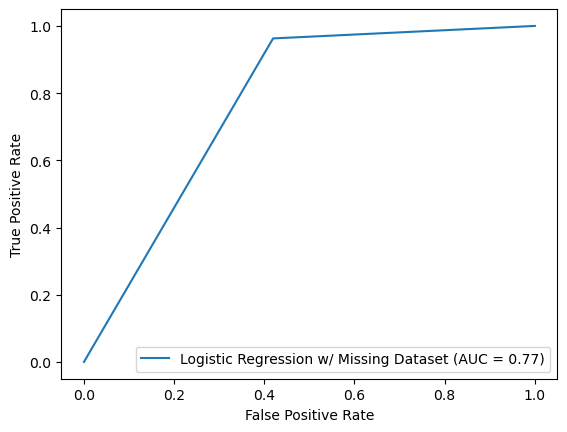

0.7716877246633403


In [100]:
#Plot ROC curve for Logistic Regression Model for missing and dropped datasets
roc_auc_log_missing = roccurveplot(y_test_missing,y_pred_log_missing, 'Logistic Regression w/ Missing Dataset')
print(roc_auc_log_missing)

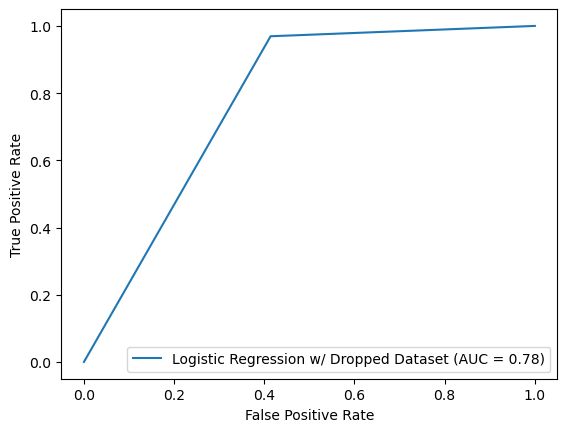

0.7776534294006253


In [101]:
roc_auc_log_dropped = roccurveplot(y_test_dropped,y_pred_log_dropped, 'Logistic Regression w/ Dropped Dataset')
print(roc_auc_log_dropped)

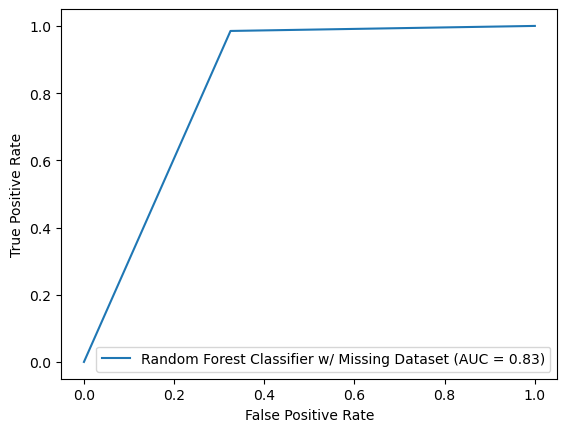

0.8300156929019797


In [102]:
roc_auc_randForest_missing = roccurveplot(y_test_missing,y_pred_randForest_missing, 'Random Forest Classifier w/ Missing Dataset')
print(roc_auc_randForest_missing)

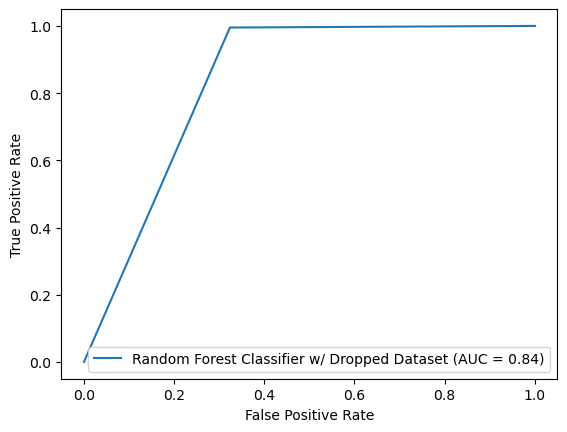

0.835722409600753


In [103]:
roc_auc_randForest_dropped = roccurveplot(y_test_dropped,y_pred_randForest_dropped, 'Random Forest Classifier w/ Dropped Dataset')
print(roc_auc_randForest_dropped)

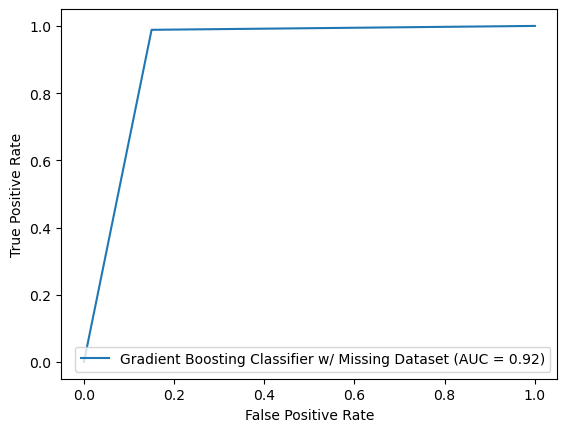

0.9192056977305649


In [104]:
roc_auc_gradBoost_missing = roccurveplot(y_test_missing,y_pred_gradBoost_missing, 'Gradient Boosting Classifier w/ Missing Dataset')
print(roc_auc_gradBoost_missing)

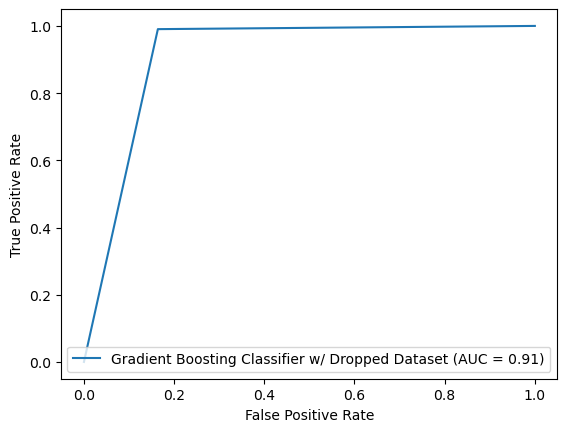

0.9132480978900307


In [105]:
roc_auc_gradBoost_dropped = roccurveplot(y_test_dropped,y_pred_gradBoost_dropped, 'Gradient Boosting Classifier w/ Dropped Dataset')
print(roc_auc_gradBoost_dropped)

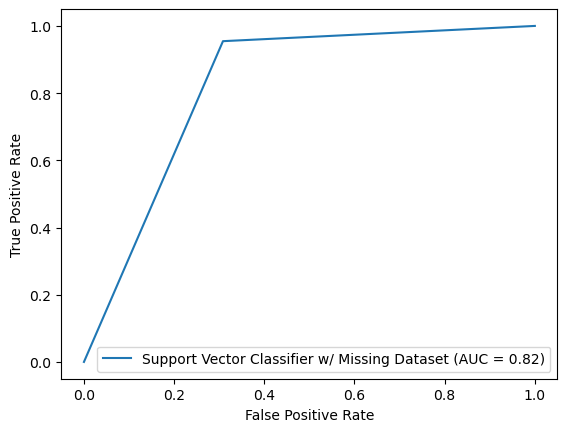

0.8231389827780461


In [91]:
roc_auc_svc_missing = roccurveplot(y_test_missing,y_pred_svc_missing, 'Support Vector Classifier w/ Missing Dataset')
print(roc_auc_svc_missing)

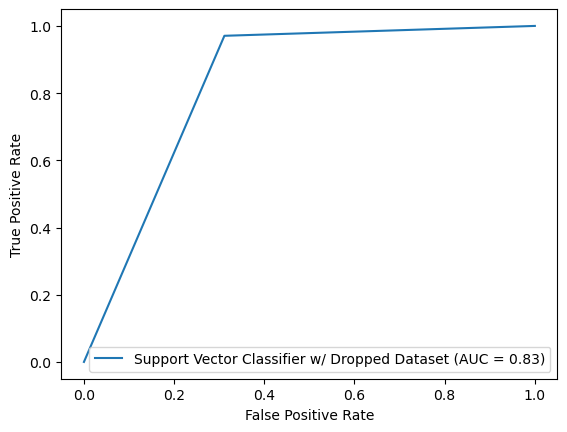

0.8295664645966631


In [92]:
roc_auc_svc_dropped = roccurveplot(y_test_dropped,y_pred_svc_dropped, 'Support Vector Classifier w/ Dropped Dataset')
print(roc_auc_svc_dropped)

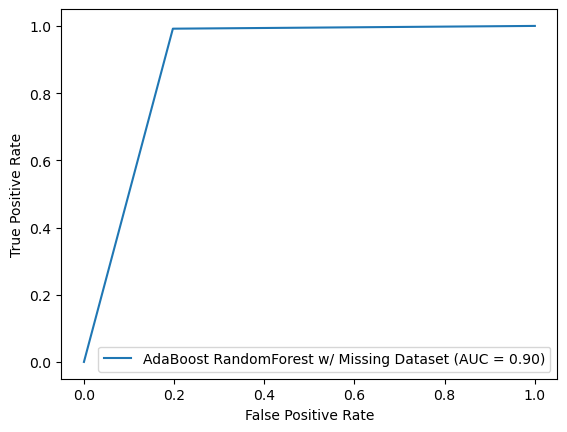

0.8972845914480391


In [93]:
roc_auc_adaBoost_randForest_missing = roccurveplot(y_test_missing,y_pred_adaBoost_decision_missing, 'AdaBoost RandomForest w/ Missing Dataset')
print(roc_auc_adaBoost_randForest_missing)

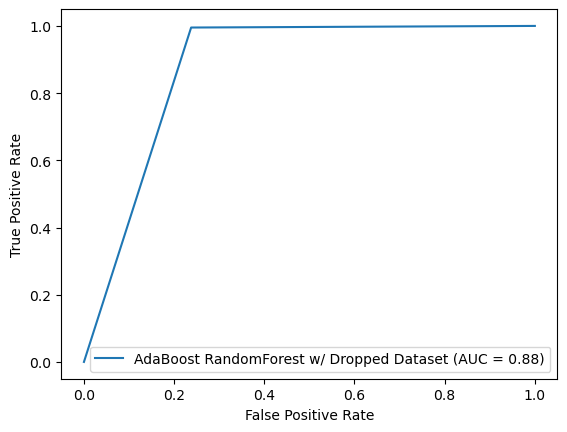

0.878755196485999


In [94]:
roc_auc_adaBoost_randForest_dropped = roccurveplot(y_test_dropped,y_pred_adaBoost_decision_dropped, 'AdaBoost RandomForest w/ Dropped Dataset')
print(roc_auc_adaBoost_randForest_dropped)

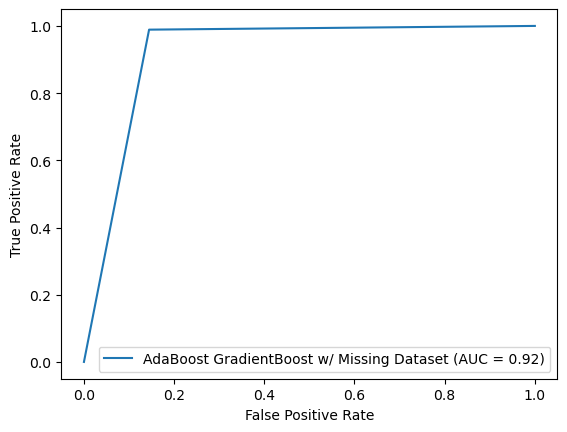

0.9222249047695692


In [95]:
roc_auc_adaBoost_gradBoost_missing = roccurveplot(y_test_missing,y_pred_adaBoost_gradient_missing, 'AdaBoost GradientBoost w/ Missing Dataset')
print(roc_auc_adaBoost_gradBoost_missing)

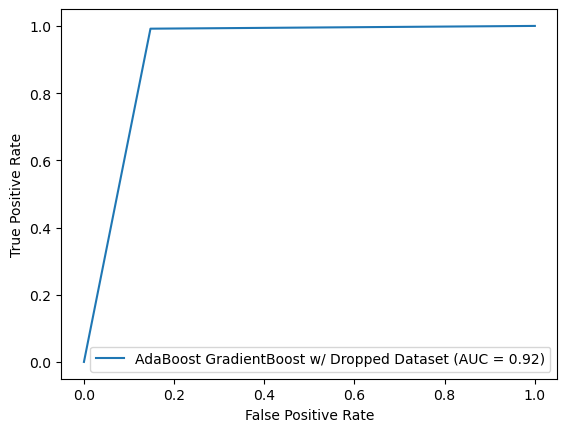

0.9221283462008225


In [96]:
roc_auc_adaBoost_gradBoost_dropped = roccurveplot(y_test_dropped,y_pred_adaBoost_gradient_dropped, 'AdaBoost GradientBoost w/ Dropped Dataset')
print(roc_auc_adaBoost_gradBoost_dropped)

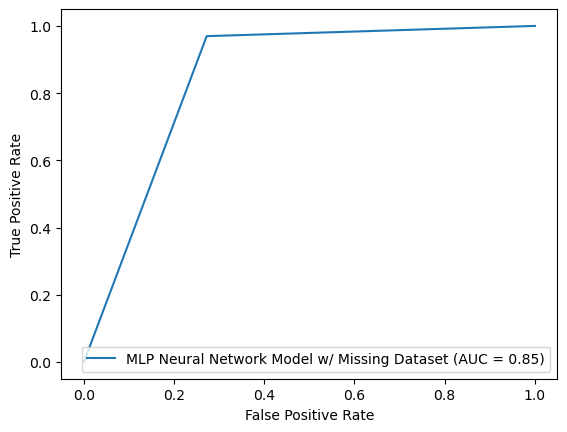

0.8486788454316219


In [99]:
roc_auc_mlpmodel_missing = roccurveplot(y_test_missing,y_pred_mlpmodel_missing, 'MLP Neural Network Model w/ Missing Dataset')
print(roc_auc_mlpmodel_missing)

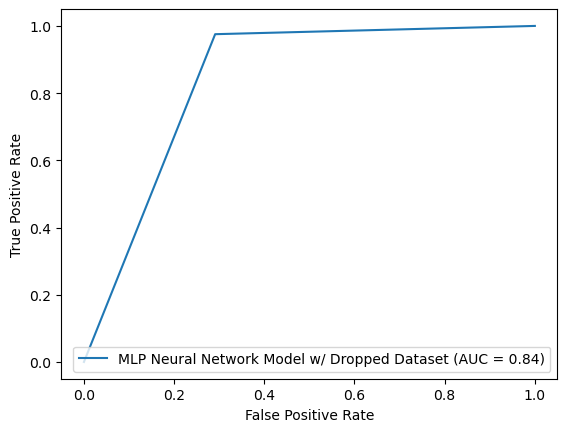

0.842204710733615


In [98]:
roc_auc_mlpmodel_dropped = roccurveplot(y_test_dropped,y_pred_mlpmodel_dropped, 'MLP Neural Network Model w/ Dropped Dataset')
print(roc_auc_mlpmodel_dropped)

### 5.6.2 Create and Compare Results DataFrame

Now compiling all the metrics used in order to adequantely compare each one of the predictive models created for each missing and dropped dataset trained dataset values.

In [84]:
#Creating Missing Dataframe to compare results of precision, recall, f1 score, accuracy, and roc_auc scores for each model.
missing_results = {'Model Name':['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Support Vector Classifier', 'AdaBoost w/ Random Forest Classifier', 'AdaBoost w/ Gradient Boosting Classifier', 'MLP Neural Network Classifier'], 'Accuracy_score':[accuracy_score(y_test_missing , y_pred_log_missing), accuracy_score(y_test_missing , y_pred_randForest_missing), accuracy_score(y_test_missing , y_pred_gradBoost_missing), accuracy_score(y_test_missing , y_pred_svc_missing), accuracy_score(y_test_missing , y_pred_adaBoost_decision_missing), accuracy_score(y_test_missing , y_pred_adaBoost_gradient_missing), accuracy_score(y_test_missing, y_pred_mlpmodel_missing)] , 'Precision_score': [precision_score(y_test_missing, y_pred_log_missing, pos_label=0) , precision_score(y_test_missing, y_pred_randForest_missing, pos_label=0) , precision_score(y_test_missing, y_pred_gradBoost_missing, pos_label=0) , precision_score(y_test_missing, y_pred_svc_missing, pos_label=0) , precision_score(y_test_missing, y_pred_adaBoost_decision_missing, pos_label=0), precision_score(y_test_missing, y_pred_adaBoost_gradient_missing, pos_label=0), precision_score(y_test_missing,y_pred_mlpmodel_missing, pos_label=0)] , 'Recall_score':[recall_score(y_test_missing, y_pred_log_missing, pos_label=0), recall_score(y_test_missing, y_pred_randForest_missing, pos_label=0), recall_score(y_test_missing, y_pred_gradBoost_missing, pos_label=0), recall_score(y_test_missing, y_pred_svc_missing, pos_label=0), recall_score(y_test_missing, y_pred_adaBoost_decision_missing, pos_label=0), recall_score(y_test_missing, y_pred_adaBoost_gradient_missing, pos_label=0), recall_score(y_test_missing,y_pred_mlpmodel_missing, pos_label=0)], 'f1_score':[f1_score(y_test_missing, y_pred_log_missing, pos_label=0), f1_score(y_test_missing, y_pred_randForest_missing, pos_label=0), f1_score(y_test_missing, y_pred_gradBoost_missing, pos_label=0) , f1_score(y_test_missing, y_pred_svc_missing, pos_label=0), f1_score(y_test_missing, y_pred_adaBoost_decision_missing, pos_label=0), f1_score(y_test_missing, y_pred_adaBoost_gradient_missing, pos_label=0), f1_score(y_test_missing,y_pred_mlpmodel_missing)], 'ROC_AUC_score':[roc_auc_log_missing, roc_auc_randForest_missing, roc_auc_gradBoost_missing, roc_auc_svc_missing, roc_auc_adaBoost_randForest_missing, roc_auc_adaBoost_gradBoost_missing, roc_auc_mlpmodel_missing], 'Training Time (Sec)': [round(time_log_missing,2), round(randForestTime_missing,2), round(gradBoostTime_missing,2), round(svcTime_missing , 2) , round(adaBoostTime_decision_missing , 2) , round(adaBoostTime_gradient_missing , 2), round(mlpmodelTime_missing, 2)]}

In [85]:
missing_results_df = pd.DataFrame(missing_results)
missing_results_df

,Model Name,Accuracy_score,Precision_score,Recall_score,f1_score,ROC_AUC_score,Training Time (Sec)
0,Logistic Regression,0.906211,0.730769,0.580556,0.647059,0.771688,15.40
1,Random Forest Classifier,0.939120,0.886861,0.675000,0.766562,0.830016,62.87
2,Gradient Boosting Classifier,0.967914,0.927273,0.850000,0.886957,0.919206,846.87
3,Support Vector Classifier,0.915673,0.725948,0.691667,0.708393,0.823139,80.43
4,AdaBoost w/ Random Forest Classifier,0.963801,0.944444,0.802778,0.867868,0.897285,1535.73
5,AdaBoost w/ Gradient Boosting Classifier,0.969148,0.930514,0.855556,0.891462,0.922225,213.50
6,MLP Neural Network Classifier,0.933772,0.806154,0.727778,0.961456,0.848679,514.61


In [86]:
#Creating Dropped Dataframe to compare results of precision, recall, f1 score, accuracy, and roc_auc scores for each model.
dropped_results = {'Model Name':['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Support Vector Classifier', 'AdaBoost w/ Random Forest Classifier', 'AdaBoost w/ Gradient Boosting Classifier','MLP Neural Network Classifier'], 'Accuracy_score':[accuracy_score(y_test_dropped , y_pred_log_dropped), accuracy_score(y_test_dropped , y_pred_randForest_dropped), accuracy_score(y_test_dropped , y_pred_gradBoost_dropped), accuracy_score(y_test_dropped , y_pred_svc_dropped), accuracy_score(y_test_dropped , y_pred_adaBoost_decision_dropped), accuracy_score(y_test_dropped , y_pred_adaBoost_gradient_dropped), accuracy_score(y_test_dropped, y_pred_mlpmodel_dropped) ] , 'Precision_score': [precision_score(y_test_dropped, y_pred_log_dropped, pos_label=0) , precision_score(y_test_dropped, y_pred_randForest_dropped, pos_label=0) , precision_score(y_test_dropped, y_pred_gradBoost_dropped, pos_label=0) , precision_score(y_test_dropped, y_pred_svc_dropped, pos_label=0) , precision_score(y_test_dropped, y_pred_adaBoost_decision_dropped, pos_label=0), precision_score(y_test_dropped, y_pred_adaBoost_gradient_dropped, pos_label=0),  precision_score(y_test_dropped,y_pred_mlpmodel_dropped, pos_label=0)] , 'Recall_score':[recall_score(y_test_dropped, y_pred_log_dropped, pos_label=0), recall_score(y_test_dropped, y_pred_randForest_dropped, pos_label=0), recall_score(y_test_dropped, y_pred_gradBoost_dropped, pos_label=0), recall_score(y_test_dropped, y_pred_svc_dropped, pos_label=0), recall_score(y_test_dropped, y_pred_adaBoost_decision_dropped, pos_label=0), recall_score(y_test_dropped, y_pred_adaBoost_gradient_dropped, pos_label=0), recall_score(y_test_dropped,y_pred_mlpmodel_dropped, pos_label=0) ], 'f1_score':[f1_score(y_test_dropped, y_pred_log_dropped, pos_label=0), f1_score(y_test_dropped, y_pred_randForest_dropped, pos_label=0), f1_score(y_test_dropped, y_pred_gradBoost_dropped, pos_label=0) , f1_score(y_test_dropped, y_pred_svc_dropped, pos_label=0), f1_score(y_test_dropped, y_pred_adaBoost_decision_dropped, pos_label=0), f1_score(y_test_dropped, y_pred_adaBoost_gradient_dropped, pos_label=0), f1_score(y_test_dropped,y_pred_mlpmodel_dropped) ], 'ROC_AUC_score':[roc_auc_log_dropped, roc_auc_randForest_dropped, roc_auc_gradBoost_dropped, roc_auc_svc_dropped, roc_auc_adaBoost_randForest_dropped, roc_auc_adaBoost_gradBoost_dropped, roc_auc_mlpmodel_dropped], 'Training Time (Sec)': [round(time_log_dropped,2), round(randForestTime_dropped,2), round(gradBoostTime_dropped,2), round(svcTime_dropped, 2) , round(adaBoostTime_decision_dropped, 2) , round(adaBoostTime_gradient_dropped, 2), round(mlpmodelTime_dropped, 2)]}

In [87]:
dropped_results_df = pd.DataFrame(dropped_results)
dropped_results_df

,Model Name,Accuracy_score,Precision_score,Recall_score,f1_score,ROC_AUC_score,Training Time (Sec)
0,Logistic Regression,0.914470,0.760638,0.586066,0.662037,0.777653,14.31
1,Random Forest Classifier,0.949619,0.959302,0.676230,0.793269,0.835722,52.23
2,Gradient Boosting Classifier,0.968366,0.935780,0.836066,0.883117,0.913248,603.65
3,Support Vector Classifier,0.930287,0.796209,0.688525,0.738462,0.829566,40.19
4,AdaBoost w/ Random Forest Classifier,0.961921,0.963731,0.762295,0.851259,0.878755,1171.65
5,AdaBoost w/ Gradient Boosting Classifier,0.971880,0.945455,0.852459,0.896552,0.922128,926.41
6,MLP Neural Network Classifier,0.937317,0.827751,0.709016,0.963864,0.842205,351.12


Looking the above comprehensive results, it seems that Logistic Regression though had the shortest training time, turned to be the worst performer for both the missing and dropped valued datasets as per predicting label of churn or '0'. The best performer overall for both the dropped and missing datasets seems to be Gradient Boosting Classifer when applied with the AdaBoost Classifier model. However, the steps involved in terms of reiterating the results will involve also retreiving the best hyperparameters for the base Gradient Boosting model so this might not be the best intuitive model in order to reproduce. However, once finding the best hyperparameters for the base Gradient Boosting model, the AdaBoost Classifier slighlty improves its prior sole Gradient Boosting counterpart as per predicting values of churn within the datasets. Though in terms of ease of reproducibility and scale, just accessing the individual Gradient Boosting Model seems sufficient for prediciting churn for the bank churn datasets. 

Some notes to mention, the AdaBoost Classifier with the Gradient Boosting Base model in the missing dataset seemed to take less training time as compared to its individual counterpart; however in the dropped dataset, the training time was higher than its individual Gradient Boosting base model counterpart which might be due to the AdaBoost needing to correct more values in the dropped versus in the missing dataset. Also it seemed the Random Forest Classifier had better performance when the values of the missing data were dropped as compared to imputing them with the categorical variable of 'missing'. This same phenomena is seen as well with the Logistic Regression and Support Vector Classifier models. It seems as well looking at the data for the MLP Neural Network Classifier models, that there needs to be further tuning potentially to test all factors for the model in order to potentially increase performance. However given the time constraints and only really allowing the model to make 200 iterations in order to create its solution, it seems sufficient to move forward with just the individual Gradient Boosting Model for predicting churn for the bank churn datasets. 

## 5.7 Save Data & Summary

In [88]:
# save the missing and dropped results dataframe to file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets'
missing_results_df.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_churn_missing_results.csv') 
dropped_results_df.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_churn_dropped_results.csv') 

After developing different models (Logistic Regression, Random Forest, Gradient Boosting, Support Vector Classifier, AdaBoost Classifier with RandomForest Base and AdaBoost Classifier with Gradient Boosting Base, and Neural Network with Multi-Layer Perceptron classifier) and comparing each of the models results with the associated true test value sets, it seems the best performer for both the missing and dropped datasets is AdaBoost Classifier model with a Hyperparameterized Gradient Boosting model base, though this model is only slightly better performer than its individual Gradient Boosting Base. Therefore, in terms of ease of reproducibility and scale, having just the Gradient Boosting Model might be sufficient to offer generalizable predictability of churn for the bank churn datasets.

However, potential future work will be to further fine tune the Multi-Layer Perceptron Neural Network Classifier model in order to see if the model with further tuned hyperparameters can outperform the Gradient Boosting model with the Ada Boost Classifier. But for the case of moving forward with a model to place into production, the individual Gradient Boosting classifier model again seems sufficient in terms of predictability for the bank churn datasets. Additional efforts would be to retrieve the feature importances of the Gradient Boosting model to gather more insight as per what features significantly affect the model.

In terms of differences between whether dropping the null values or imputing the null values with the categorical variable 'missing', the training time overall was shorter in the dropped dataset versus the missing except for the AdaBoost Classifier with Gradient Boosting Base model. It seems there is a mixed response as per effectiveness of dropping versus imputing the missing values. Dropping the rows lead to Logistic Regression, Random Forest, and Support Vector Classifier models having slightly better performance than its imputed counterpart, however performance slightly suffered in terms of dropped versus missing for Gradient Boosting, and the AdaBoost Classifiers counterpart where missing dataset had a better performance in terms of recall in predicting 0 label or churn, f1_score, and ROC_AUC_score. Therefore, imputing 'missing' values with a categorical variable of 'missing' will be added as well for future datasets prior to prediction.